### WHAT TO DO WITH THE DATASET
***
Implementing unsupervised clustering which is agglomerative clustering. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviors of the customer. It also helps the business to cater to the concerns of different types of customers.

<div class="alert alert-block alert-warning">
<b>
TABLE OF CONTENTS
</div>

* 1. IMPORTING LIBRARIES
* 2. LOADING DATA
* 3. DATA CLEANING
* 4. DATA PREPROCESSING
* 5. DIMENSIONALITY REDUCTION
* 6. CLUSTERING
* 7. EVALUATING MODELS
* 8. PROFILING
* 9. CONCLUSION
* 10. END

<div class="alert alert-block alert-warning">
<b>
1. IMPORTING LIBRARIES    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<div class="alert alert-block alert-warning">
<b>
2. LOADING THE DATA
</div>

In [2]:
df_raw = pd.read_csv('C:/Users/lode/Downloads/data_science/customer_segmentation/marketing_campaign.csv', sep = '\t')

In [3]:
pd.set_option('display.max_columns', None)
df_raw

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [4]:
df = df_raw.copy()

<div class="alert alert-block alert-warning">
<b>
3. DATA CLEANING
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

__FROM OUTPUT ABOVE, WE CAN CONCLUDE AND NOTE:__
* There are missing values in income. Compared to the total of datasets, percentage of missing values is very low. So, i'll just drop it.
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime.
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df = df.dropna()

__Creating a feature out of Dt_Customer that indicates the number of days a customer registered in the database.__

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)

In [11]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


__Creating a feature ("membership") of the number of days the customers started to shop in the store relative to the last recorded date__

In [12]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)

df['membership'] = days
df['membership'] = pd.to_numeric(df['membership'], errors = 'coerce')

__I will be performing the following steps to engineer some new features:__

* Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
* Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
* Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating "Family_Size"
* Create a feature "Is_Parent" to indicate parenthood status
* Lastly, I will create three categories in the "Education" by simplifying its value counts.
* Dropping some of the redundant features

In [13]:
#Feature engineering
df['age'] = 2022 - df['Year_Birth']

df['spent'] = df['MntWines'] + df['MntSweetProducts'] + df['MntMeatProducts'] + df['MntGoldProds'] + df['MntFruits'] + df['MntFishProducts']

df['living_with'] = df['Marital_Status'].map({'Married' : 'Partner',
                                              'Together' :'Partner',
                                              'Absurd' :'Alone',
                                              'Widow':'Alone',
                                              'YOLO':'Alone',
                                              'Divorced':'Alone',
                                              'Single':'Alone'})

df['children'] = df['Kidhome'] + df['Teenhome']

df['family_size'] = df['living_with'].map({'Alone' : 1, 'Partner' : 2}) + df['children']

df['is_parent'] = np.where(df['children'] > 0, 1, 0)

df['Education'] = df['Education'].map({'Basic':'Undergraduate',
                                       '2n Cycle':'Undergraduate',
                                       'Graduation':'Graduate',
                                       'Master':'Postgraduate',
                                       'PhD':'Postgraduate'})

df = df.rename(columns = {'MntWines': 'Wines','MntFruits':'Fruits',
                          'MntMeatProducts':'Meat','MntFishProducts':'Fish',
                          'MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
               
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
               
df = df.drop(to_drop, axis = 1)

In [14]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,membership,age,spent,living_with,children,family_size,is_parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,65,1617,Alone,0,1.0,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,68,27,Alone,2,3.0,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,57,776,Partner,0,2.0,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,38,53,Partner,1,3.0,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,41,422,Partner,1,3.0,1


In [15]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,membership,age,spent,children,family_size,is_parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2213.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,53.179603,607.075361,0.947202,2.592408,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.906165,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,45.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,63.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,5.000000,1.000000


__FROM ABOVE, WE CAN CONCLUDE:__
* There are some outliers in income and age feature. Altough the data is old, it is very strange to have max age value 128yr old. The mean income also very different compared to the max income. Indicating there are outliers in both income and age value.

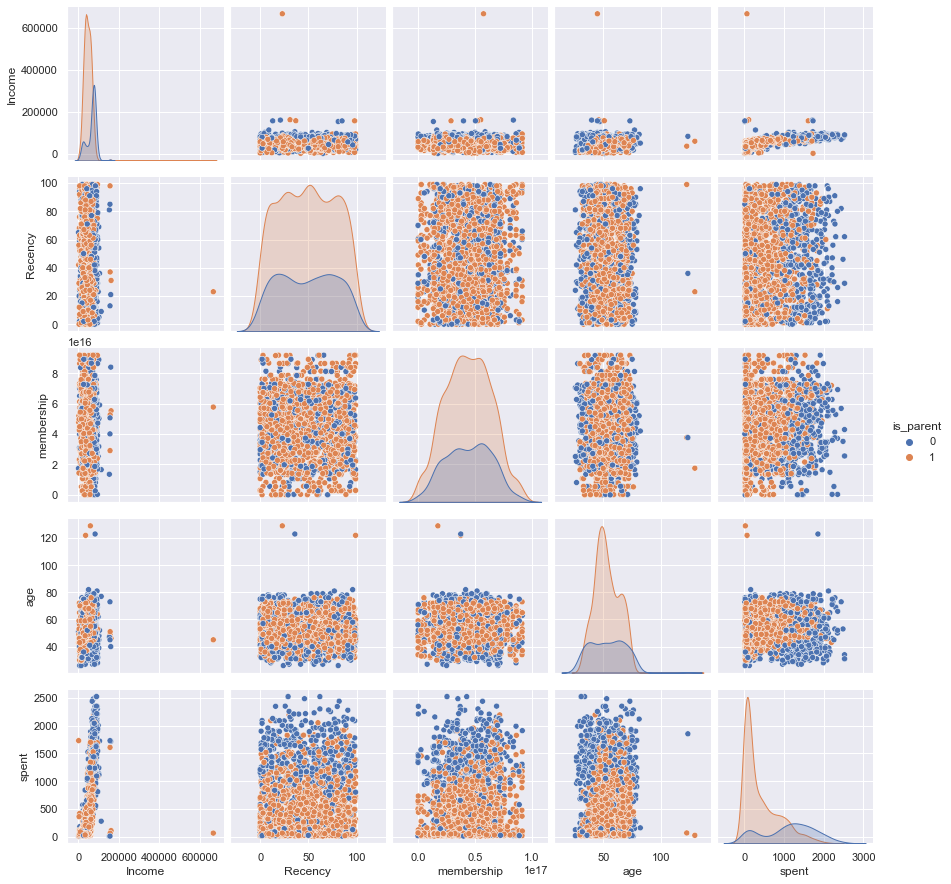

In [16]:
#There are outliers in incomne and age features
to_plot = ['Income', 'Recency', 'membership', 'age', 'spent', 'is_parent']

sns.pairplot(df[to_plot], hue = 'is_parent')

__From graph aboove, we can clearly see there are a few outliers in income and age features. So, i'll just drop the outliers.__

In [17]:
#Dropping the outliers
df = df[df['age'] < 90]
df = df[df['Income'] < 600000]

<AxesSubplot:>

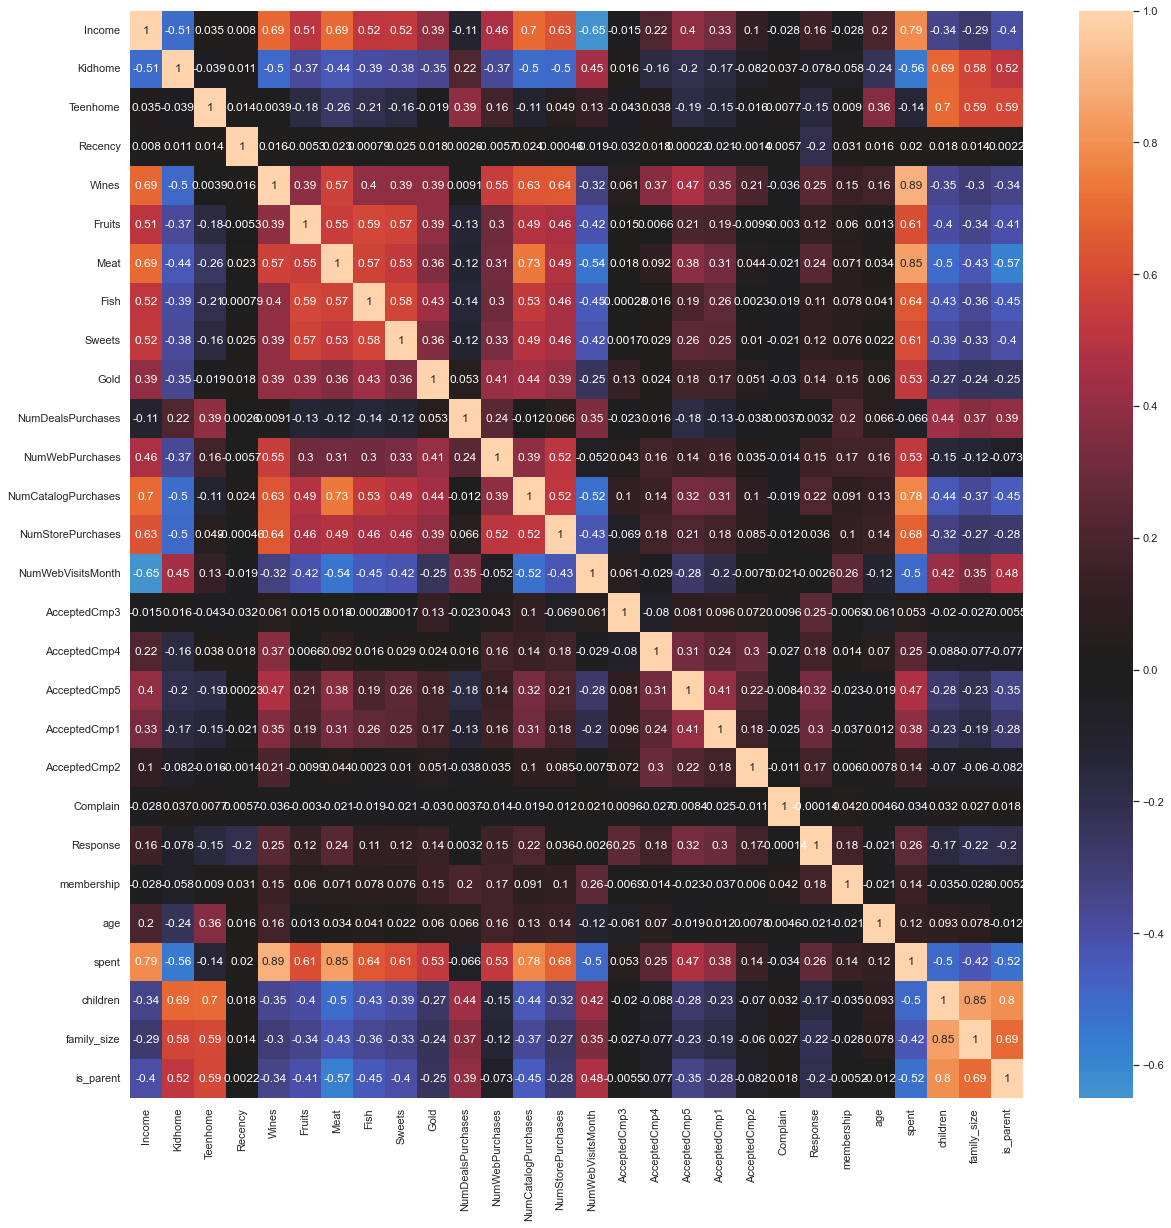

In [18]:
#Checking correlation between features
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, center = 0)

<div class="alert alert-block alert-warning">
<b>
4. DATA PREPROCESSING
</div>

__The following steps are applied to preprocess the data:__

* Label encoding the categorical features
* Scaling the features using the standard scaler
* Creating a subset dataframe for dimensionality reduction

In [19]:
c = (df.dtypes == 'object')
object_cols = list(c[c].index)
object_cols

['Education', 'living_with']

In [20]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [21]:
#Label encoding categorical features
for i in object_cols:
    df[i] = df[[i]].apply(LE.fit_transform)

In [22]:
df = df.dropna()

In [23]:
df_encoded = df.copy()

cols_delete = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
               'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

df_encoded = df_encoded.drop(cols_delete, axis =1)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
#scalling all features
scaler.fit(df_encoded)

scaled_df = pd.DataFrame(scaler.transform(df_encoded), columns = df_encoded.columns)

In [26]:
scaled_df.shape

(2209, 23)

<div class="alert alert-block alert-warning">
<b>
5. DIMENSIONALITY REDUCTION  
</div>


In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
__Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.__

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

In [27]:
from sklearn.decomposition import PCA

In [28]:
#Typically, we want the explained variance to be between 95–99%. So, i'll use 95% for n_components
pca = PCA(n_components = 0.95)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df))

In [29]:
#reducing number of features from 23 to 16 with 95% variance
PCA_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4.989975,-0.151796,2.650245,-0.161061,1.010864,-0.531000,-0.628006,-1.109300,1.835890,0.811550,1.029026,-0.589544,1.254407,-0.539276,0.819401,0.276221
1,-2.885459,-0.006655,-1.867707,-1.466946,1.783494,0.592466,0.086686,-0.017982,0.726408,0.543062,0.297428,-0.464094,0.105101,0.024635,-0.063861,-0.156762
2,2.614704,-0.719470,-0.255298,-0.034652,-0.651232,0.607228,-1.610986,0.048260,-0.740399,-0.541593,0.937024,-0.151390,-1.093963,0.181907,0.828002,0.876259
3,-2.677539,-1.539054,-0.925240,1.196364,0.559789,1.065172,-0.577588,1.113612,-0.998347,0.142618,0.612991,0.121949,-0.155892,0.005494,0.205855,-0.325995
4,-0.652373,0.211009,-0.019418,1.661963,0.297134,-0.973787,1.366737,0.649018,-0.889023,0.328177,1.158215,0.740127,-0.353426,-0.109492,0.029984,0.590448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,2.317719,2.437759,0.521089,0.646039,0.596265,0.146620,-1.457212,-1.125870,-2.025771,1.067431,-1.174129,-1.471096,1.619040,0.892508,-1.178967,-0.613249
2205,-3.107108,4.019863,-1.501993,0.481476,0.048887,0.202255,1.388629,0.981812,0.255286,1.647453,2.555513,-1.151166,-0.603895,0.448428,-0.284585,0.586323
2206,2.670626,-1.870238,0.588260,-1.046046,0.852313,-1.193669,0.176115,1.942913,-0.732473,-1.057009,0.206620,0.153747,-1.589814,-0.663480,0.038762,-1.690871
2207,1.491119,1.702988,-1.628469,-0.528540,-0.993800,1.396746,-0.023265,-0.336881,-0.407305,0.060210,-0.108074,0.098310,-0.279414,0.186568,0.561827,0.191255


<div class="alert alert-block alert-warning">
<b>
6. CLUSTERING
</div>

Now that I have reduced the attributes to 16 dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

__Steps involved in the Clustering:__

* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [30]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

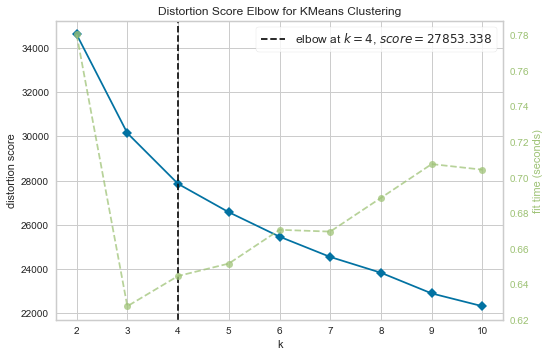

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
elbow = KElbowVisualizer(KMeans(), k = 10)
elbow.fit(PCA_df)
elbow.show()
#k with values 4 will be an optimal number of clusters for the data.

In [33]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 4)

yhat_ac = ac.fit_predict(PCA_df)

PCA_df['cluster'] = yhat_ac

df['cluster'] = yhat_ac

In [35]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,membership,age,spent,living_with,children,family_size,is_parent,cluster
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,65,1617,0,0,1.0,0,3
1,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,68,27,0,2,3.0,1,1
2,0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,57,776,1,0,2.0,0,3
3,0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,38,53,1,1,3.0,1,2
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,41,422,1,1,3.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,46742400000000000,55,1341,1,1,3.0,1,0
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,5270400000000000,76,444,1,3,5.0,1,1
2237,0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,27216000000000000,41,1241,0,0,1.0,0,3
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,27302400000000000,66,843,1,1,3.0,1,0


<div class="alert alert-block alert-warning">
<b>
7. EVALUATING MODELS
</div>


Text(0.5, 1.0, 'Distribution Of the Clusters')

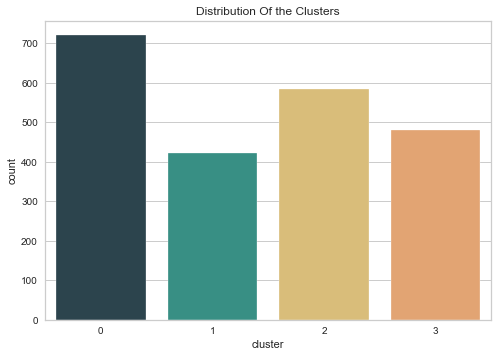

In [44]:
pal = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261']
sns.countplot(x = df['cluster'], palette = pal)
plt.title('Distribution Of the Clusters')

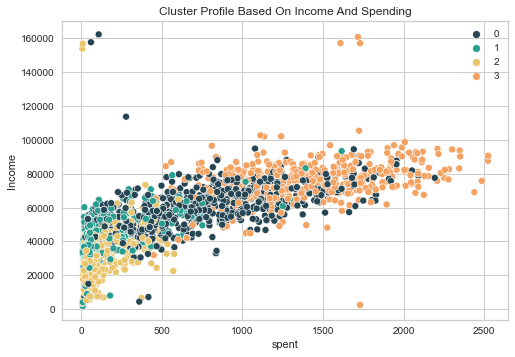

In [45]:
sns.scatterplot(data = df, x = df['spent'], y = df['Income'],
               hue = df['cluster'], palette = pal)
plt.title('Cluster Profile Based On Income And Spending')
plt.legend()
plt.show()

__From scatter plot above with cluster, we can conclude:__
* group 0 : high spending & average income
* group 1 : low spending & average income
* group 2 : low spending & low income
* group 3 : high spending & high income

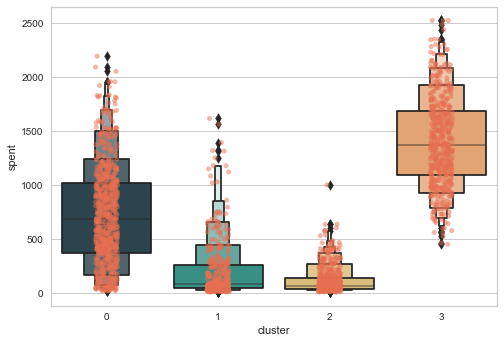

In [50]:
sns.stripplot(x = df['cluster'], y = df['spent'], color = '#e76f51', alpha = 0.5)
sns.boxenplot(x = df['cluster'], y = df['spent'], palette = pal)
plt.show()

__From the plot above, it can be clearly seen that cluster 3 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.__

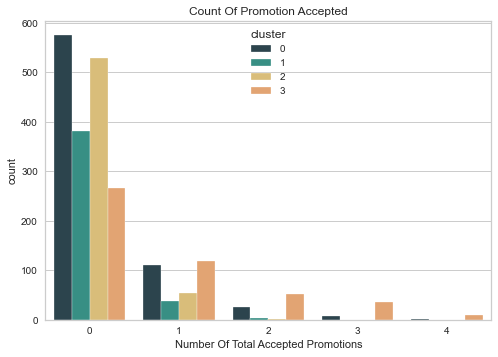

In [54]:
df['total_promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

plt.figure()
sns.countplot(x = df['total_promos'], hue = df['cluster'], palette = pal)
plt.title('Count Of Promotion Accepted')
plt.xlabel('Number Of Total Accepted Promotions')
plt.show()

__From graph above, we can conclude:__
* Very few participants overall in promotions campaign.
* Perhaps better-targeted and well-planned campaigns are required to boost sales.

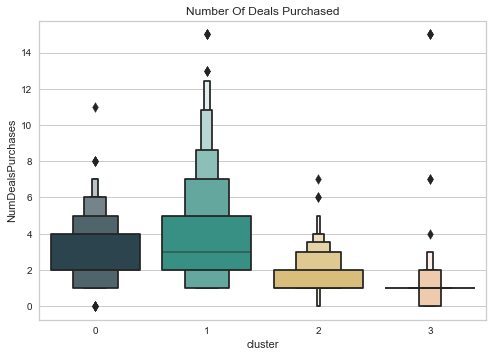

In [56]:
sns.boxenplot(y = df['NumDealsPurchases'], x = df['cluster'], palette = pal)
plt.title('Number Of Deals Purchased')
plt.show()

__From graph above, we can conclude:__
* Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 0.
* However, our star customers cluster 3 are not much into the deals

<div class="alert alert-block alert-warning">
<b>
8. PROFILING
</div>

<Figure size 864x432 with 0 Axes>

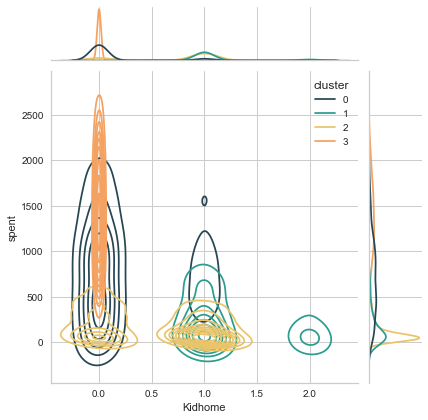

<Figure size 864x432 with 0 Axes>

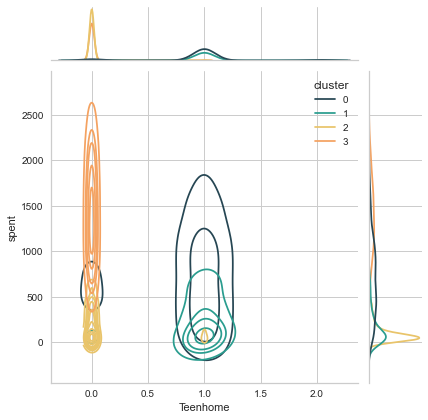

<Figure size 864x432 with 0 Axes>

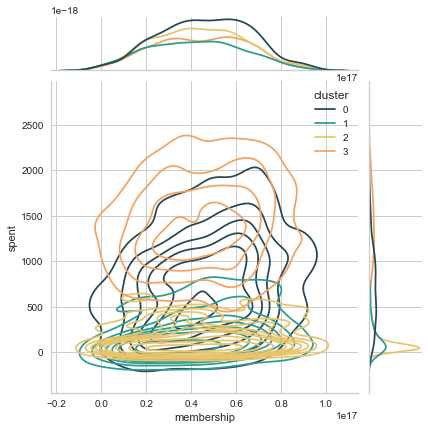

<Figure size 864x432 with 0 Axes>

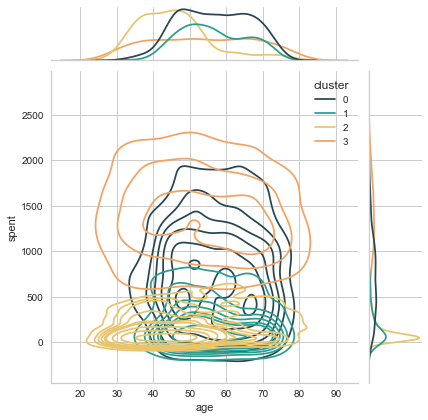

<Figure size 864x432 with 0 Axes>

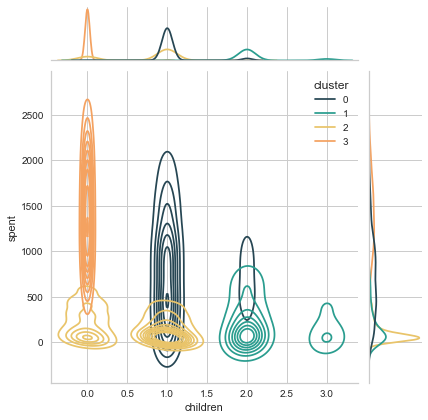

<Figure size 864x432 with 0 Axes>

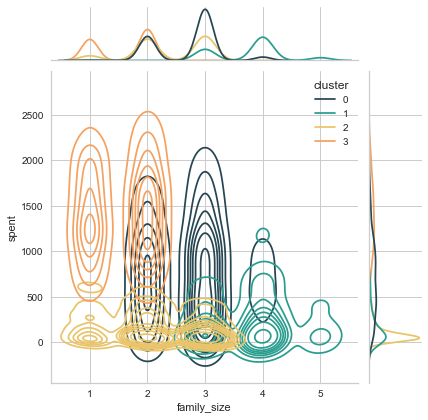

<Figure size 864x432 with 0 Axes>

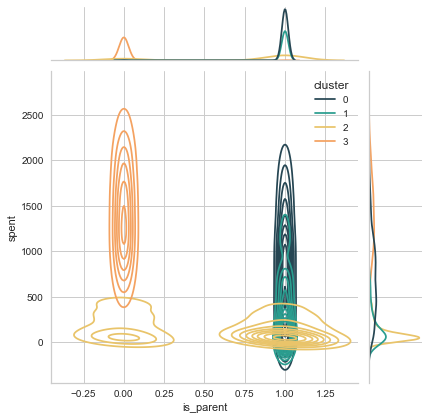

<Figure size 864x432 with 0 Axes>

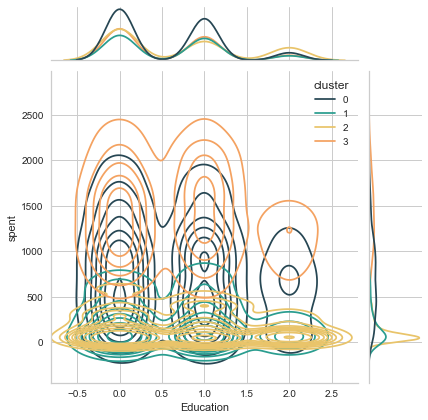

<Figure size 864x432 with 0 Axes>

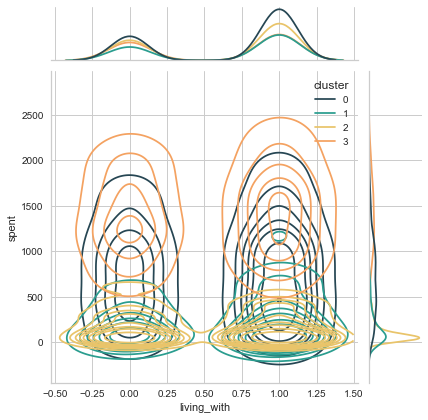

In [59]:
personal = ['Kidhome', 'Teenhome', 'membership', 'age', 'children',
           'family_size', 'is_parent', 'Education', 'living_with']

for i in personal:
    plt.figure(figsize = (12, 6))
    sns.jointplot(x = df[i], y = df['spent'], hue = df['cluster'], kind = 'kde', palette = pal)
    plt.show()

<div class="alert alert-block alert-warning">
<b>
9. CONCLUSION
</div>

__Abouts cluster number: 0__
* definitely a parent
* max have 3 members in the family size, and min have 2
* most have teenager at home
* relatively older
* high spending and average income

__Abouts cluster number: 1__
* definitely a parent
* definitely have kids
* max have 5 member  in the family size, and min have 3
* relatively older
* low spending and average income

__Abouts cluster number: 2__
* mostly a parent
* have subset of not a parent
* have 3 members in the family size, and min have 1
* range of age wery wide, between 20 - 80 year old
* low spending & low income

__About cluster number: 3__
* definetily not a parent
* max have 2 member in the family size, and min have 1
* range of age wery wide, between 20 - 80 year old
* high spending and high income

<div class="alert alert-block alert-warning">
<b>
10. END
</div>